# 🧑‍🤝‍🧑 Team Task: Exploratory Data Analysis (EDA)

Dear team,  

This notebook is our shared workspace. Each member should explore the dataset and contribute their insights. Please follow the steps below:

1. **Explore the dataset**  
   - Look at the columns, data types, and missing values.  
   - Summarize key statistics (mean, median, min, max, etc.).  
   - Visualize distributions (histograms, boxplots, etc.).  

2. **Analyze patterns**  
   - Identify correlations between features.  
   - Look for outliers or unusual trends.  
   - Suggest potential transformations or feature engineering ideas.  

3. **Document your findings**  
   - Write your analysis and observations in *Markdown cells*.  
   - Include plots and code where relevant.  
   - End with **suggestions** for what we, as a group, should focus on.  

---

✅ **Goal:**  
By the end, we will have multiple perspectives on the data. Then, as a group, we’ll decide on:  
- The main problems or questions to solve  
- The best features to use for modeling  
- Next steps in our project  

---


# Columns Details

**Basic Player Information**
Player– Player's name,
Nation – Player's nationality,
Pos – Position (FW, MF, DF, GK),
Squad – Club name,
Comp – League,
Age – Age of the player,
Born – Year of birth

**Playing Time & Appearances**
MP – Matches played,
Starts – Games started,
Min – Minutes played,
90s – Number of full 90-minute matches played

**Attacking Stats**
Gls – Goals scored,
Ast – Assists provided,
G+A – Goals + Assists,
xG – Expected goals,
xAG – Expected assists,
npxG – Non-penalty expected goals,
G-PK – Goals excluding penalties

**Defensive Stats**
Tkl – Total tackles,
TklW – Tackles won,
Blocks_stats_defense – Blocks made,
Int – Interceptions,
Tkl+Int – Combined tackles and interceptions,
Clr – Clearances,
Err – Errors leading to goals

**Passing & Creativity Stats**
PrgP – Progressive passes,
PrgC – Progressive carries,
KP – Key passes (passes leading to a shot),
Cmp%_stats_passing – Pass completion percentage,
Ast_stats_passing – Assists,
xA – Expected assists,
PPA – Passes into the penalty area

**Goalkeeping Stats**
GA – Goals conceded,
Saves – Saves made,
Save% – Save percentage,
CS – Clean sheets,
CS% – Clean sheet percentage,
PKA – Penalties faced,
PKsv – Penalty saves

**Possession & Ball Control**
Touches – Total touches of the ball,
Carries – Total ball carries,
PrgR – Progressive runs (carries moving the ball forward significantly),
Mis – Miscontrols,
Dis – Times dispossessed

**Miscellaneous Stats**
CrdY – Yellow cards,
CrdR – Red cards,
PKwon – Penalties won,
PKcon – Penalties conceded,
Recov – Ball recoveries

In [2709]:
import sys
!{sys.executable} -m pip install pycountry

In [2710]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry

In [2711]:
df = pd.read_csv("/home/razan/.pyenv/versions/3.10.6/envs/future_stars/future_stars/data/players_data_light-2024_2025.csv")
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,G+A-PK,xG+xAG,PrgC,PrgP,PrgR,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK_stats_shooting,PKatt_stats_shooting,xG_stats_shooting,npxG_stats_shooting,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Ast_stats_passing,xAG_stats_passing,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP_stats_passing,Live,Dead,FK_stats_passing_types,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp_stats_passing_types,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Att_stats_defense,Tkl%,Lost,Blocks_stats_defense,Sh_stats_defense,Pass,Int,Tkl+Int,Clr,Err,SCA,SCA90,PassLive,PassDead,TO,Sh_stats_gca,Fld,Def,GCA,GCA90,Touches,Def Pen,Def 3rd_stats_possession,Mid 3rd_stats_possession,Att 3rd_stats_possession,Att Pen,Live_stats_possession,Att_stats_possession,Succ,Succ%,Tkld,Tkld%,Carries,TotDist_stats_possession,PrgDist_stats_possession,PrgC_stats_possession,1/3_stats_possession,CPA,Mis,Dis,Rec,PrgR_stats_possession,CrdY_stats_misc,CrdR_stats_misc,2CrdY,Fls,Fld_stats_misc,Off_stats_misc,Crs_stats_misc,Int_stats_misc,TklW_stats_misc,PKwon,PKcon,OG,Recov,Won,Lost_stats_misc,Won%,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt_stats_keeper,PKA,PKsv,PKm,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp_stats_keeper_adv,Att_stats_keeper_adv,Cmp%_stats_keeper_adv,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,1,8,3,0,0,NaN,0.00,0.0,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,50,63,79.4,887,361,0,0.0,0.0,0.0,0,8,0,0,8,51,12,2,0,0,2,10,0,0,0,0,50,2,2,1,1,0,1,100.0,0,3,1,2,1,3,0,0,2,2.09,2,0,0,0,0,0,0,0.0,73,2,19,40,15,0,73,2,0,0.0,1,50.0,41,152,68,1,0,0,1,0,40,3,0,0,0,0,2,0,2,1,2,0,0,0,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,120,1.3,0,0,0,0,0,0,2,0,0.0,0.0,0.0,0.0,0.0,0.02,0,6,10,0,0,NaN,0.00,0.0,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,47,66,71.2,705,190,0,0.0,0.0,0.0,1,2,0,0,6,54,12,1,0,0,5,11,0,0,0,0,47,4,4,2,2,0,5,80.0,1,1,0,1,0,4,3,0,1,0.75,1,0,0,0,0,0,0,0.0,85,1,21,28,36,0,85,4,1,25.0,2,50.0,46,215,103,0,3,0,3,1,49,10,2,0,0,0,2,0,5,0,4,0,0,0,7,2,1,66.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,65,0.7,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,0.0,0.10,3,2,3,1,0,0.0,1.38,0.0,0.0,NaN,24.5,0,0,0,0.1,0.1,0.07,-0.1,-0.1,17,29,58.6,268,110,0,0.0,0.0,0.0,0,0,0,0,2,21,8,0,0,0,1,8,0,0,0,0,17,3,2,2,1,0,3,100.0,0,1,0,1,1,4,0,0,0,0.00,0,0,0,0,0,0,0,0.0,36,1,8,19,9,1,36,1,1,100.0,0,0.0,13,101,67,3,2,1,0,2,16,3,1,0,0,2,0,1,1,1,2,0,0,0,2,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,88,1.0,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,0.0,0.06,3,4,1,1,0,0.0,1.02,0.0,0.0,NaN,15.0,0,0,0,0.1,0.1,0.06,-0.1,-0.1,36,46,78.3,614,206,0,0.0,0.0,0.0,0,2,0,0,4,45,1,1,0,0,0,0,0,0,0,0,36,4,2,4,0,0,3,66.7,1,2,1,1,1,5,3,0,1,1.02,1,0,0,0,0,0,0,0.0,65,8,37,22,7,2,65,0,0,NaN,0,NaN,29,219,165,3,1,1,1,3,34,1,1,0,0,4,3,0,0,1,2,0,0,0,7,2,2,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,3,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,1,0,0,0,0,NaN,0.00,0.0,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,2,2,100.0,41,0,0,0.0,0.0,0.0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,1,100.0,0,0,0,0,0,1,0,0,0,0.00,0,0,0,0,0,0,0,0.0,4,0,3,1,0,0,4,0,0,NaN,0,NaN,1,10,9,1,0,0,1,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2712]:
df.shape

(2854, 165)

# Exploring the data

In [2713]:
selected_columns = [
    # Player info
    "Player", "Nation", "Pos", "Age",

    # Playing time
    "MP", "Starts", "Min", "90s",

    # Attacking
    "Gls", "Ast", "xG", "xAG", "G+A",

    # Defensive
    "Tkl", "TklW", "Blocks_stats_defense", "Clr", "Err",

    # Passing & Creativity Stats
    "PrgP", "PrgC", "KP", "xA",

    # Goalkeeping
    "GA", "Saves", "Save%", "CS", "CS%", "PKA", "PKsv",

    # Miscellaneous Stats
    "CrdY", "CrdR"
]

filtered_df = df[selected_columns].copy()

print(" filtered dataframe shape:", filtered_df.shape)

# Display all the columns
pd.set_option("display.max_columns", None)
filtered_df.head()

 filtered dataframe shape: (2854, 31)


,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,xG,xAG,G+A,Tkl,TklW,Blocks_stats_defense,Clr,Err,PrgP,PrgC,KP,xA,GA,Saves,Save%,CS,CS%,PKA,PKsv,CrdY,CrdR
0,Max Aarons,eng ENG,DF,24.0,3,1,86,1.0,0,0,0.0,0.0,0,2,2,3,0,0,8,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,Max Aarons,eng ENG,"DF,MF",24.0,4,1,120,1.3,0,0,0.0,0.0,0,4,4,1,3,0,6,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
2,Rodrigo Abajas,es ESP,DF,21.0,1,1,65,0.7,0,0,0.1,0.0,0,3,2,1,0,0,2,3,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,James Abankwah,ie IRL,"DF,MF",20.0,6,0,88,1.0,0,0,0.1,0.0,0,4,2,2,3,0,4,3,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,Keyliane Abdallah,fr FRA,FW,18.0,1,0,3,0.0,0,0,0.0,0.0,0,1,1,0,0,0,0,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [2714]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player                2854 non-null   object 
 1   Nation                2847 non-null   object 
 2   Pos                   2854 non-null   object 
 3   Age                   2846 non-null   float64
 4   MP                    2854 non-null   int64  
 5   Starts                2854 non-null   int64  
 6   Min                   2854 non-null   int64  
 7   90s                   2854 non-null   float64
 8   Gls                   2854 non-null   int64  
 9   Ast                   2854 non-null   int64  
 10  xG                    2854 non-null   float64
 11  xAG                   2854 non-null   float64
 12  G+A                   2854 non-null   int64  
 13  Tkl                   2854 non-null   int64  
 14  TklW                  2854 non-null   int64  
 15  Blocks_stats_defense 

In [2715]:
filtered_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Player,2854,2702,Rodri,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nation,2847,113,es ESP,415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pos,2854,10,DF,859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2846.0,NaN,NaN,NaN,25.018974,4.491624,15.0,22.0,25.0,28.0,41.0
MP,2854.0,NaN,NaN,NaN,19.012964,11.502122,1.0,9.0,20.0,30.0,38.0
Starts,2854.0,NaN,NaN,NaN,13.497547,11.322991,0.0,3.0,11.0,23.0,38.0
Min,2854.0,NaN,NaN,NaN,1211.529082,965.191628,1.0,317.25,1052.5,1996.75,3420.0
90s,2854.0,NaN,NaN,NaN,13.460792,10.724564,0.0,3.5,11.7,22.2,38.0
Gls,2854.0,NaN,NaN,NaN,1.682901,3.152732,0.0,0.0,0.0,2.0,31.0
Ast,2854.0,NaN,NaN,NaN,1.200771,1.94617,0.0,0.0,0.0,2.0,18.0


In [2716]:
# Check for missing data
missing_data = filtered_df.isna().mean().mul(100).round(2).sort_values(ascending=False).astype(str) + '%'
missing_data.head(30)

CS%                     92.89%
Save%                   92.78%
PKsv                    92.57%
Saves                   92.57%
GA                      92.57%
PKA                     92.57%
CS                      92.57%
Age                      0.28%
Nation                   0.25%
90s                       0.0%
Player                    0.0%
Pos                       0.0%
MP                        0.0%
Starts                    0.0%
Min                       0.0%
TklW                      0.0%
Tkl                       0.0%
G+A                       0.0%
xAG                       0.0%
xG                        0.0%
Ast                       0.0%
Gls                       0.0%
Blocks_stats_defense      0.0%
xA                        0.0%
KP                        0.0%
PrgC                      0.0%
PrgP                      0.0%
Clr                       0.0%
Err                       0.0%
CrdY                      0.0%
dtype: object

In [2717]:
print("Unique positions:", filtered_df["Pos"].unique())
print("Unique nations:", filtered_df["Nation"].nunique())
filtered_df["Nation"].value_counts().head(10)

Unique positions: ['DF' 'DF,MF' 'FW' 'MF,FW' 'MF' 'FW,MF' 'GK' 'FW,DF' 'DF,FW' 'MF,DF']
Unique nations: 113


Nation
es ESP     415
fr FRA     346
de GER     232
it ITA     227
eng ENG    224
br BRA      89
ar ARG      77
pt POR      64
nl NED      62
dk DEN      56
Name: count, dtype: int64

## Some Players with 2 postions 

### what are u suggesting?

In [2718]:
duplicated_players_count = filtered_df["Player"].duplicated().sum()
print("Number of non-unique players:", duplicated_players_count)

Number of non-unique players: 152


In [2719]:
# Keep only the primary position
#filtered_df['Primary_Pos'] = filtered_df['Pos'].str.split(',').str[0]
#filtered_df[['Player', 'Pos', 'Primary_Pos']].head()

In [2720]:
# Select the position where each player played the most minutes
main_df = (
    filtered_df.sort_values("Min", ascending=False)
    .drop_duplicates(subset="Player")
    .sort_index()
)

# Check result
main_df[["Player", "Pos", "Min"]].head(10)

,Player,Pos,Min
1,Max Aarons,"DF,MF",120
2,Rodrigo Abajas,DF,65
3,James Abankwah,"DF,MF",88
4,Keyliane Abdallah,FW,3
5,Yunis Abdelhamid,DF,1033
6,Himad Abdelli,"MF,FW",2842
7,Mohamed Abdelmoneim,DF,855
8,Ali Abdi,"DF,MF",1393
9,Saud Abdulhamid,DF,205
10,Abel,DF,2074


In [2721]:
# Keep only the first position if multiple positions exist
main_df["Pos"] = main_df["Pos"].str.split(",").str[0].str.strip()

main_df.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,xG,xAG,G+A,Tkl,TklW,Blocks_stats_defense,Clr,Err,PrgP,PrgC,KP,xA,GA,Saves,Save%,CS,CS%,PKA,PKsv,CrdY,CrdR
1,Max Aarons,eng ENG,DF,24.0,4,1,120,1.3,0,0,0.0,0.0,0,4,4,1,3,0,6,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
2,Rodrigo Abajas,es ESP,DF,21.0,1,1,65,0.7,0,0,0.1,0.0,0,3,2,1,0,0,2,3,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,James Abankwah,ie IRL,DF,20.0,6,0,88,1.0,0,0,0.1,0.0,0,4,2,2,3,0,4,3,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,Keyliane Abdallah,fr FRA,FW,18.0,1,0,3,0.0,0,0,0.0,0.0,0,1,1,0,0,0,0,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
5,Yunis Abdelhamid,ma MAR,DF,36.0,16,11,1033,11.5,0,0,0.2,0.1,0,17,11,26,57,1,22,4,2,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0


In [2722]:
main_df.shape

(2702, 31)

In [2723]:
#fill missing Age values with median age (to do)
#filtered_df['Age'] = filtered_df['Age'].fillna(filtered_df['Age'].median())print("\nAfter filling Age with median:")print(filtered_df[['Age','Player']].head(10))
missing_data = main_df.isna().mean().mul(100).round(2).sort_values(ascending=False).astype(str) + '%'
missing_data.head(31)

CS%                     92.64%
Save%                   92.52%
PKsv                     92.3%
Saves                    92.3%
GA                       92.3%
PKA                      92.3%
CS                       92.3%
Age                       0.3%
Nation                   0.26%
90s                       0.0%
Player                    0.0%
Pos                       0.0%
MP                        0.0%
Starts                    0.0%
Min                       0.0%
TklW                      0.0%
Tkl                       0.0%
G+A                       0.0%
xAG                       0.0%
xG                        0.0%
Ast                       0.0%
Gls                       0.0%
Blocks_stats_defense      0.0%
xA                        0.0%
KP                        0.0%
PrgC                      0.0%
PrgP                      0.0%
Clr                       0.0%
Err                       0.0%
CrdY                      0.0%
CrdR                      0.0%
dtype: object

In [2724]:
# Count missing values in Age column
missing_counts = main_df["Age"].isna().sum()
print(missing_counts)


8


In [2725]:
missing_age_players = main_df[main_df['Age'].isna()][['Player', 'Age']]
print(missing_age_players)

                   Player  Age
100         Olabade Aluko  NaN
273        Hannes Behrens  NaN
663   Pape Daouda Diongue  NaN
862            Jake Evans  NaN
1518            Fer López  NaN
1603          Mateus Mane  NaN
1769        Max Moerstedt  NaN
1778         Jeremy Monga  NaN


In [2726]:
#Fill missing values in Age column with median age
main_df['Age'] = main_df['Age'].fillna(main_df['Age'].median()).astype(int)

print("\nAfter filling Age with median and converting to int:")
print(main_df[['Player','Age']].head(10))


After filling Age with median and converting to int:
                 Player  Age
1            Max Aarons   24
2        Rodrigo Abajas   21
3        James Abankwah   20
4     Keyliane Abdallah   18
5      Yunis Abdelhamid   36
6         Himad Abdelli   24
7   Mohamed Abdelmoneim   25
8              Ali Abdi   30
9       Saud Abdulhamid   25
10                 Abel   23


In [2727]:
missing_data = main_df.isna().mean().mul(100).round(2).sort_values(ascending=False).astype(str) + '%'
missing_data.head(31)

CS%                     92.64%
Save%                   92.52%
PKsv                     92.3%
Saves                    92.3%
GA                       92.3%
PKA                      92.3%
CS                       92.3%
Nation                   0.26%
90s                       0.0%
Player                    0.0%
Pos                       0.0%
Age                       0.0%
MP                        0.0%
Starts                    0.0%
Min                       0.0%
TklW                      0.0%
Tkl                       0.0%
G+A                       0.0%
xAG                       0.0%
xG                        0.0%
Ast                       0.0%
Gls                       0.0%
Blocks_stats_defense      0.0%
xA                        0.0%
KP                        0.0%
PrgC                      0.0%
PrgP                      0.0%
Clr                       0.0%
Err                       0.0%
CrdY                      0.0%
CrdR                      0.0%
dtype: object

In [2728]:
# Replace NaN with the string "Null" only in goalkeeping columns
goalkeeping_cols = ['CS%', 'Save%', 'PKsv', 'Saves', 'GA', 'PKA', 'CS']

main_df[goalkeeping_cols] = main_df[goalkeeping_cols].fillna("Null")

print("After replacing NaN with 'Null' for goalkeeping columns:")
print(main_df[goalkeeping_cols].head())

After replacing NaN with 'Null' for goalkeeping columns:
    CS% Save%  PKsv Saves    GA   PKA    CS
1  Null  Null  Null  Null  Null  Null  Null
2  Null  Null  Null  Null  Null  Null  Null
3  Null  Null  Null  Null  Null  Null  Null
4  Null  Null  Null  Null  Null  Null  Null
5  Null  Null  Null  Null  Null  Null  Null


In [2729]:
missing_data = main_df.isna().mean().mul(100).round(2).sort_values(ascending=False).astype(str) + '%'
missing_data.head(31)

Nation                  0.26%
Player                   0.0%
Pos                      0.0%
Age                      0.0%
MP                       0.0%
Starts                   0.0%
Min                      0.0%
90s                      0.0%
Gls                      0.0%
Ast                      0.0%
xG                       0.0%
xAG                      0.0%
G+A                      0.0%
Tkl                      0.0%
TklW                     0.0%
Blocks_stats_defense     0.0%
Clr                      0.0%
Err                      0.0%
PrgP                     0.0%
PrgC                     0.0%
KP                       0.0%
xA                       0.0%
GA                       0.0%
Saves                    0.0%
Save%                    0.0%
CS                       0.0%
CS%                      0.0%
PKA                      0.0%
PKsv                     0.0%
CrdY                     0.0%
CrdR                     0.0%
dtype: object

In [2730]:
# Count missing Nation values
missing_nation_count = main_df['Nation'].isna().sum()
print("Number of missing Nation values:", missing_nation_count)

missing_nation_rows = main_df[main_df['Nation'].isna()]

print(missing_nation_rows)


Number of missing Nation values: 7
              Player Nation Pos  Age  MP  Starts   Min   90s  Gls  Ast   xG  \
100    Olabade Aluko    NaN  DF   25   1       0     2   0.0    0    0  0.0   
862       Jake Evans    NaN  FW   25   4       0    24   0.3    0    0  0.0   
1320  Atakan Karazor    NaN  MF   27  32      31  2618  29.1    2    4  2.3   
1518       Fer López    NaN  FW   25  17       7   671   7.5    2    0  2.7   
1603     Mateus Mane    NaN  MF   25   1       0     2   0.0    0    0  0.0   
1778    Jeremy Monga    NaN  FW   25   7       0   112   1.2    0    0  0.2   
1917  Plamedi Nsingi    NaN  MF   23   1       0    16   0.2    0    0  0.2   

      xAG  G+A  Tkl  TklW  Blocks_stats_defense  Clr  Err  PrgP  PrgC  KP  \
100   0.0    0    1     1                     0    0    0     0     0   0   
862   0.0    0    1     1                     0    1    0     0     0   0   
1320  2.6    6   59    29                    39   51    1   140    19  15   
1518  1.9    2    9     

In [2731]:
#pycountry does not write nation name correctly
main_df["Nation"] = filtered_df["Nation"].str.split().str[-1]

def full_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return code

main_df["Nation"] = main_df["Nation"].apply(full_country_name)
print(main_df[["Player", "Nation"]].head(20))

                 Player   Nation
1            Max Aarons      ENG
2        Rodrigo Abajas    Spain
3        James Abankwah  Ireland
4     Keyliane Abdallah   France
5      Yunis Abdelhamid  Morocco
6         Himad Abdelli      ALG
7   Mohamed Abdelmoneim    Egypt
8              Ali Abdi  Tunisia
9       Saud Abdulhamid      KSA
10                 Abel    Spain
11        Nabil Aberdin   France
12    Oliver Abildgaard      DEN
13       Matthis Abline   France
14                Abner   Brazil
15    Zakaria Aboukhlal  Morocco
16          Abdel Abqar  Morocco
18        Tammy Abraham      ENG
19   Federico Accornero    Italy
20     Francesco Acerbi    Italy
21    Joshua Acheampong      ENG


In [2732]:
# Manual mapping for Nation codes that pycountry does not handle correctly
custom_map = {
    'KSA':'Saudi Arabia', 'SCO':'Scotland', 'WAL':'Wales', 'NIR':'Northern Ireland',
    'ENG':'England', 'ALG':'Algeria', 'DEN':'Denmark', 'IRL':'Ireland',
    'CIV':"Côte d'Ivoire", 'RSA':'South Africa', 'TUR':'Turkey', 'UAE':'United Arab Emirates',
    'SUI':'Switzerland', 'CZE':'Czech Republic', 'KOR':'South Korea', 'NED':'Netherlands',
    'POR':'Portugal', 'SRB':'Serbia', 'SVK':'Slovakia', 'USA':'United States',
    'GER':'Germany', 'FRA':'France', 'ESP':'Spain', 'ITA':'Italy', 'BRA':'Brazil',
    'ARG':'Argentina', 'MEX':'Mexico', 'JPN':'Japan', 'COL':'Colombia', 'URU':'Uruguay',
    'BEL':'Belgium', 'CRO':'Croatia', 'MAR':'Morocco', 'GHA':'Ghana', 'NGA':'Nigeria',
    'TUN':'Tunisia', 'EGY':'Egypt', 'CMR':'Cameroon', 'IRN':'Iran', 'AUS':'Australia',
    'CAN':'Canada', 'BIH':'Bosnia and Herzegovina', 'SVN':'Slovenia', 'ROU':'Romania',
    'BUL':'Bulgaria', 'HUN':'Hungary', 'FIN':'Finland', 'ISL':'Iceland', 'NOR':'Norway',
    'LTU':'Lithuania', 'LAT':'Latvia', 'EST':'Estonia', 'ALB':'Albania', 'MKD':'North Macedonia',
    'AND':'Andorra', 'LUX':'Luxembourg', 'KVX':'Kosovo', 'GRE':'Greece', 'TOG':'Togo',
    'HAI':'Haiti', 'PAR':'Paraguay', 'GUI':'Guinea', 'GAM':'Gambia', 'CTA':'Catalonia',
    'PUR':'Puerto Rico', 'CHI':'Chile', 'MAD':'Madagascar', 'ZIM':'Zimbabwe', 'MAS':'Malaysia',
    'EQG':'Equatorial Guinea', 'ANG':'Angola', 'ZAM':'Zambia', 'PHI':'Philippines',
    'BAN':'Bangladesh', 'CGO':'Congo', 'CRC':'Costa Rica'
}
main_df["Nation"] = main_df["Nation"].replace(custom_map)
print("After replacing custom Nation codes:")
print(main_df["Nation"].head(20))

After replacing custom Nation codes:
1          England
2            Spain
3          Ireland
4           France
5          Morocco
6          Algeria
7            Egypt
8          Tunisia
9     Saudi Arabia
10           Spain
11          France
12         Denmark
13          France
14          Brazil
15         Morocco
16         Morocco
18         England
19           Italy
20           Italy
21         England
Name: Nation, dtype: object


In [2733]:
manual_nations = {
    "Olabade Aluko": "England",
    "Jake Evans": "England",
    "Atakan Karazor": "Germany",
    "Fer López": "Spain",
    "Mateus Mane": "England",
    "Jeremy Monga": "England",
    "Plamedi Nsingi": "Congo"
}

# Fill Nation column for these players
for player, country in manual_nations.items():
    main_df.loc[main_df['Player'] == player, 'Nation'] = country

# Check the rows to confirm
print(main_df[main_df['Player'].isin(manual_nations.keys())][['Player', 'Nation']])

              Player   Nation
100    Olabade Aluko  England
862       Jake Evans  England
1320  Atakan Karazor  Germany
1518       Fer López    Spain
1603     Mateus Mane  England
1778    Jeremy Monga  England
1917  Plamedi Nsingi    Congo


### Not all countries appears on full name

the dataset uses **FIFA codes**, not standard **ISO codes**  
- Examples: KSA (Saudi Arabia) 
- pycountry only knows **ISO codes** like SAU  for Saudi Arabis 

That’s why some countries stayed as codes and didn’t convert to full names

In [2734]:
missing_data = main_df.isna().mean().mul(100).round(2).sort_values(ascending=False).astype(str) + '%'
missing_data.head(31)

Player                  0.0%
Nation                  0.0%
Pos                     0.0%
Age                     0.0%
MP                      0.0%
Starts                  0.0%
Min                     0.0%
90s                     0.0%
Gls                     0.0%
Ast                     0.0%
xG                      0.0%
xAG                     0.0%
G+A                     0.0%
Tkl                     0.0%
TklW                    0.0%
Blocks_stats_defense    0.0%
Clr                     0.0%
Err                     0.0%
PrgP                    0.0%
PrgC                    0.0%
KP                      0.0%
xA                      0.0%
GA                      0.0%
Saves                   0.0%
Save%                   0.0%
CS                      0.0%
CS%                     0.0%
PKA                     0.0%
PKsv                    0.0%
CrdY                    0.0%
CrdR                    0.0%
dtype: object

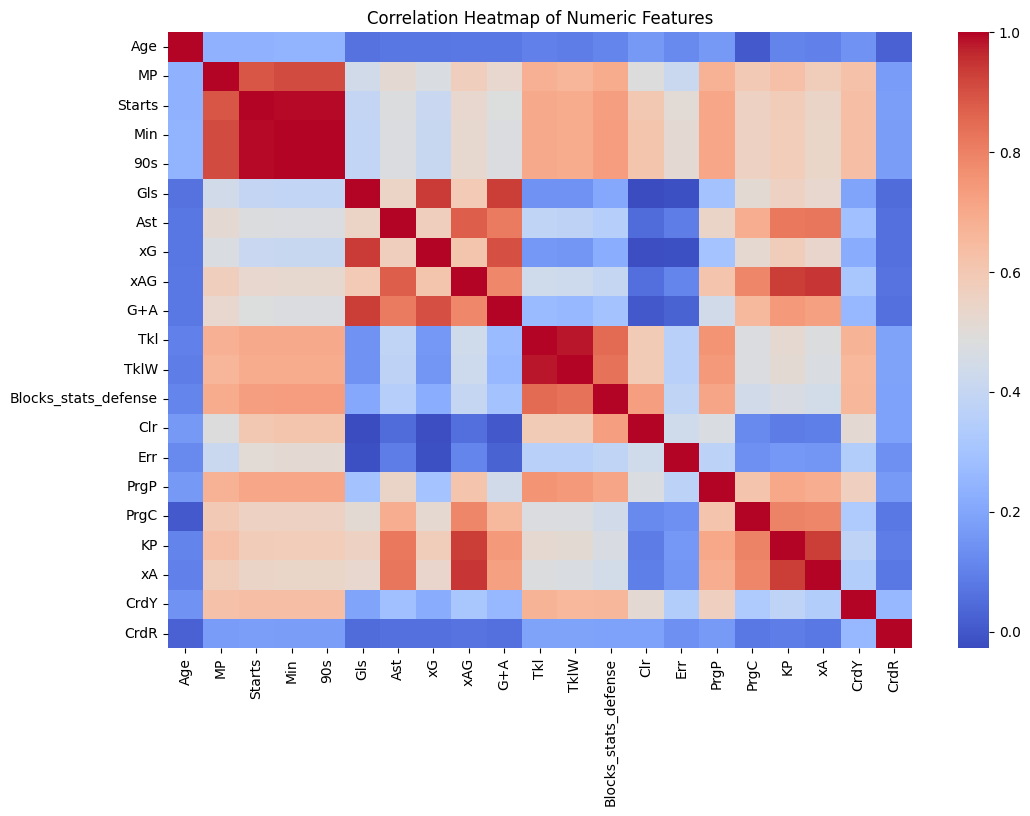

In [2735]:
dc = main_df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(12,8))
sns.heatmap(dc.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## Correlation Insights

From the correlation heatmap, I observed several **strong correlations**:

- **Playing time metrics**:  
  - MP, Starts, Min, and 90s are highly correlated.  
  - It make sence because more matches, more starts, more minutes, more full games.  

- **Attacking metrics**:  
  - Gls and xG show strong positive correlation (players with high expected goals usually score more).  
  - Ast correlates strongly with xAG and xA.  

- **Defensive metrics**:  
  - Tkl and TklW are highly correlated (players who attempt more tackles usually win more).    

- **Goalkeeping metrics**:  
  - GA (goals conceded) is negatively correlated with Save%, CS, CS%, and PKsv.  
  - This means that better goalkeepers are conceding fewer goals and has more clean sheets.  

- **Other features**:  
  - CrdY, CrdR don’t strongly correlate with most other features, so they are independent information.  

---

### Decision
This is the **EDA phase**, I will **not drop any columns yet**.  
For **modeling later**, we may drop or merge some of these highly correlated features to reduce redundancy.



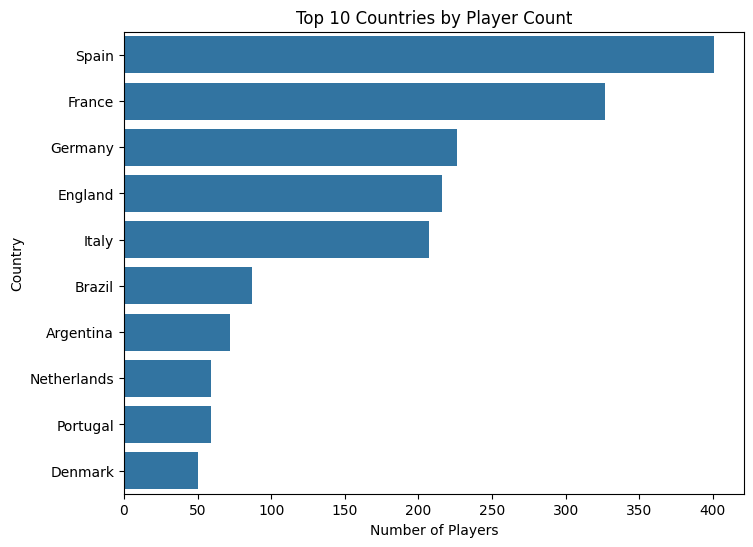

In [2736]:
# This is important for our project, because scouts needs to know which country has the most players
top_nations = main_df["Nation"].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_nations.values, y=top_nations.index)
plt.title("Top 10 Countries by Player Count")
plt.xlabel("Number of Players")
plt.ylabel("Country")
plt.show()

# Explore Players Contribution

In [2737]:
df_contrib = main_df.copy()

# Convert data into per 90 min so we have a fair coparison
df_contrib["Goals_per90"] = (df_contrib["Gls"] / df_contrib["Min"]) * 90
df_contrib["Assists_per90"] = (df_contrib["Ast"] / df_contrib["Min"]) * 90
df_contrib["GA_per90"] = (df_contrib["G+A"] / df_contrib["Min"]) * 90


# Top 10 in each feature
top_goals = df_contrib.sort_values("Goals_per90", ascending=False).head(10)
top_assists = df_contrib.sort_values("Assists_per90", ascending=False).head(10)
top_ga = df_contrib.sort_values("GA_per90", ascending=False).head(10)

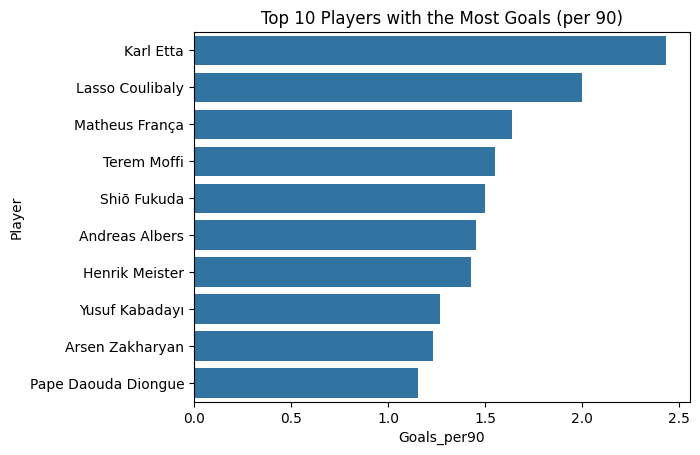

In [2738]:
sns.barplot(x="Goals_per90", y="Player", data=top_goals)
plt.title("Top 10 Players with the Most Goals (per 90)")
plt.show()

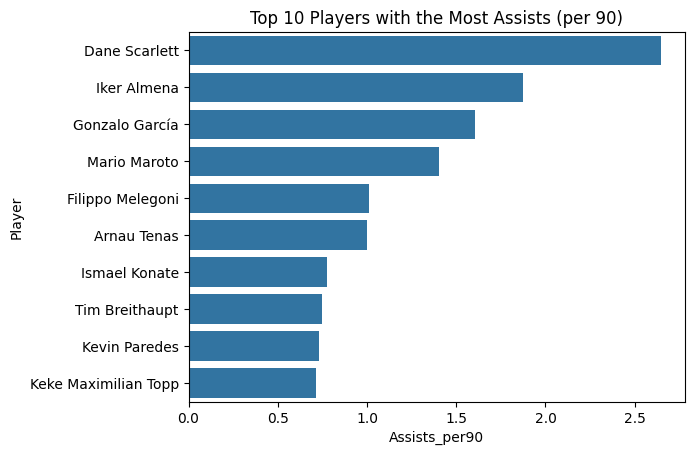

In [2739]:
sns.barplot(x="Assists_per90", y="Player", data=top_assists)
plt.title("Top 10 Players with the Most Assists (per 90)")
plt.show()

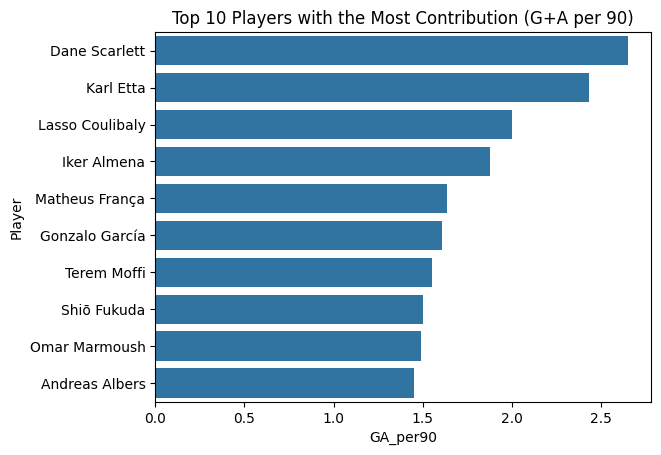

In [2740]:
sns.barplot(x="GA_per90", y="Player", data=top_ga)
plt.title("Top 10 Players with the Most Contribution (G+A per 90)")
plt.show()